In [1]:
#创建环境
import grid2op
from tqdm.notebook import tqdm  # for easy progress bar
from grid2op.PlotGrid import PlotMatplot
env = grid2op.make("rte_case5_example", test=True)

D:\virtualenvironment\L2PRN_grid2op\lib\site-packages\grid2op\MakeEnv\Make.py:265: UserWarning: You are using a development environment. This environment is not intended for training agents. It might not be up to date and its primary use if for tests (hence the "test=True" you passed as argument). Use at your own risk.
  warnings.warn(_MAKE_DEV_ENV_WARN)


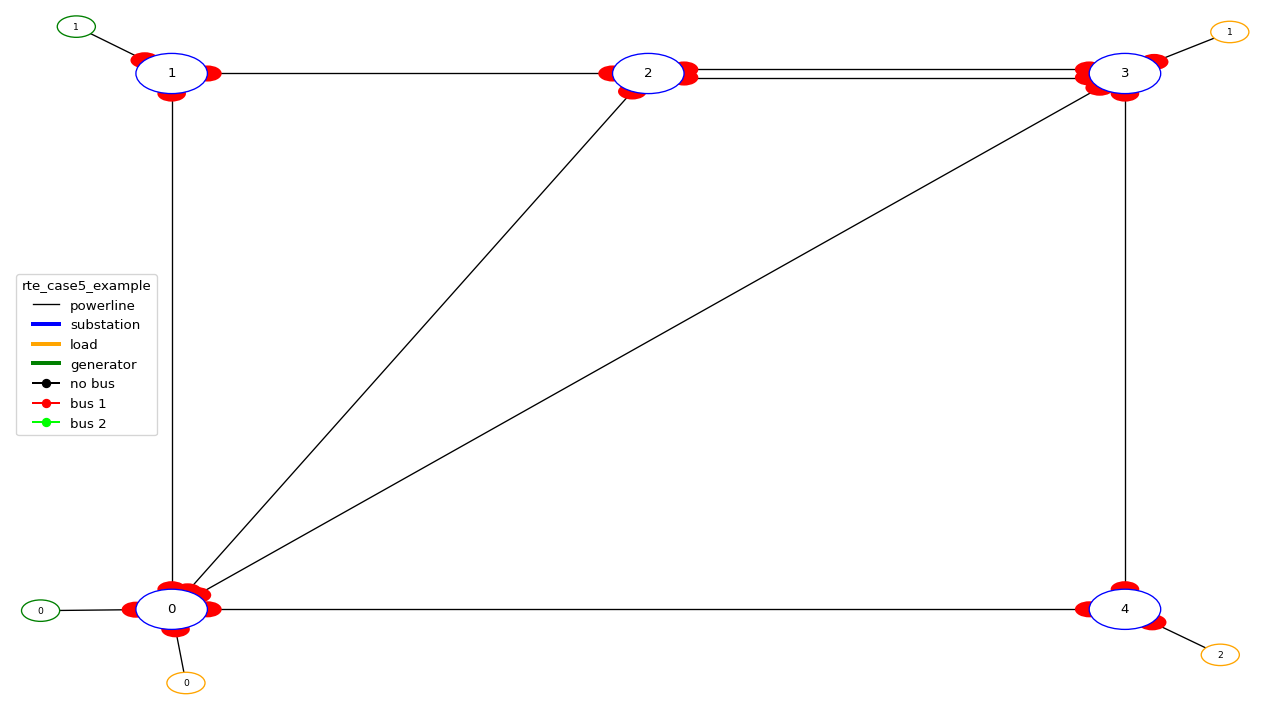

In [2]:
#画电网拓扑图
plot_helper = PlotMatplot(env.observation_space)
_ = plot_helper.plot_layout()

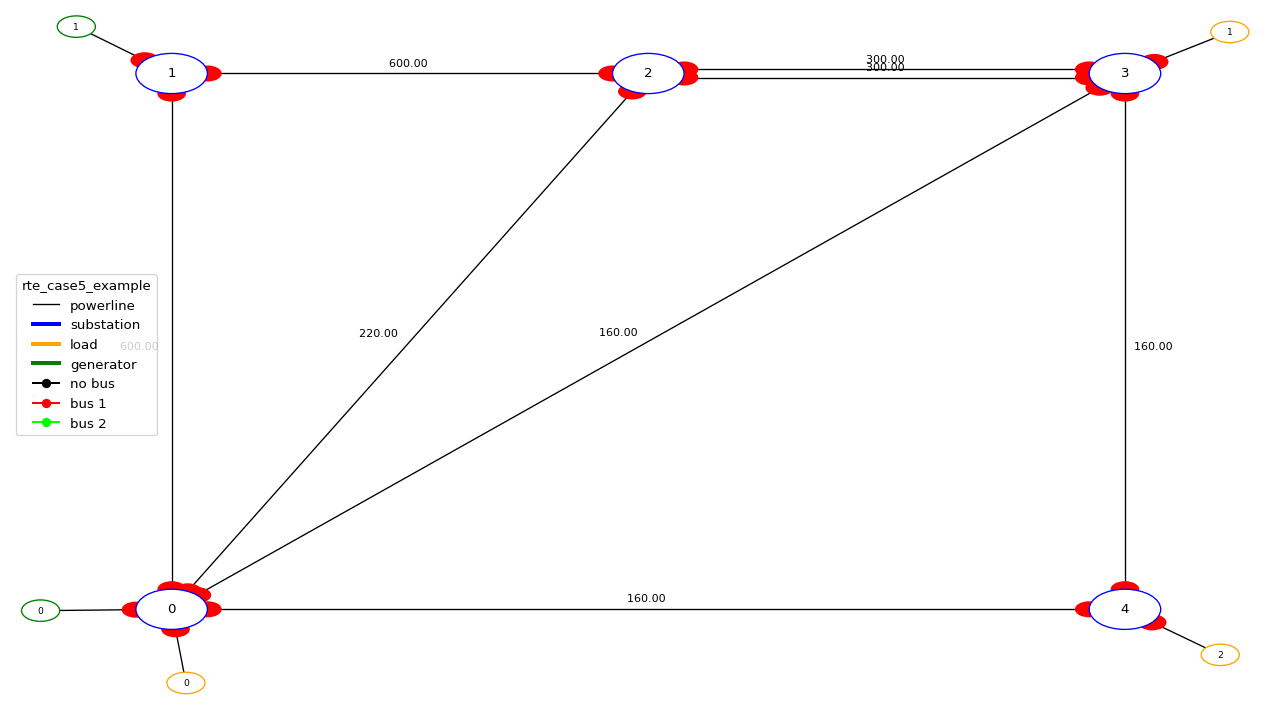

In [4]:
#看温度上限 (一种线的属性)
_ = plot_helper.plot_info(line_values=env._thermal_limit_a)

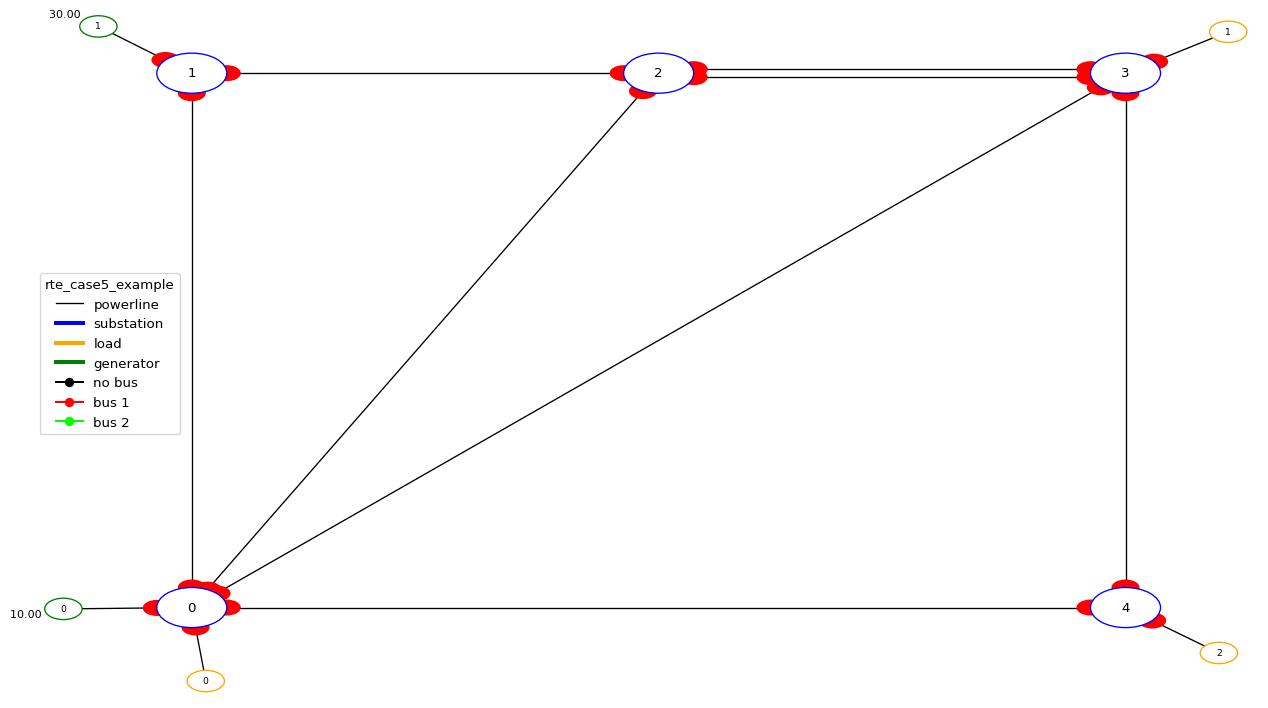

In [5]:
#类似的，可以查看发电机输出功率上限
_ = plot_helper.plot_info(gen_values=env.gen_pmax)

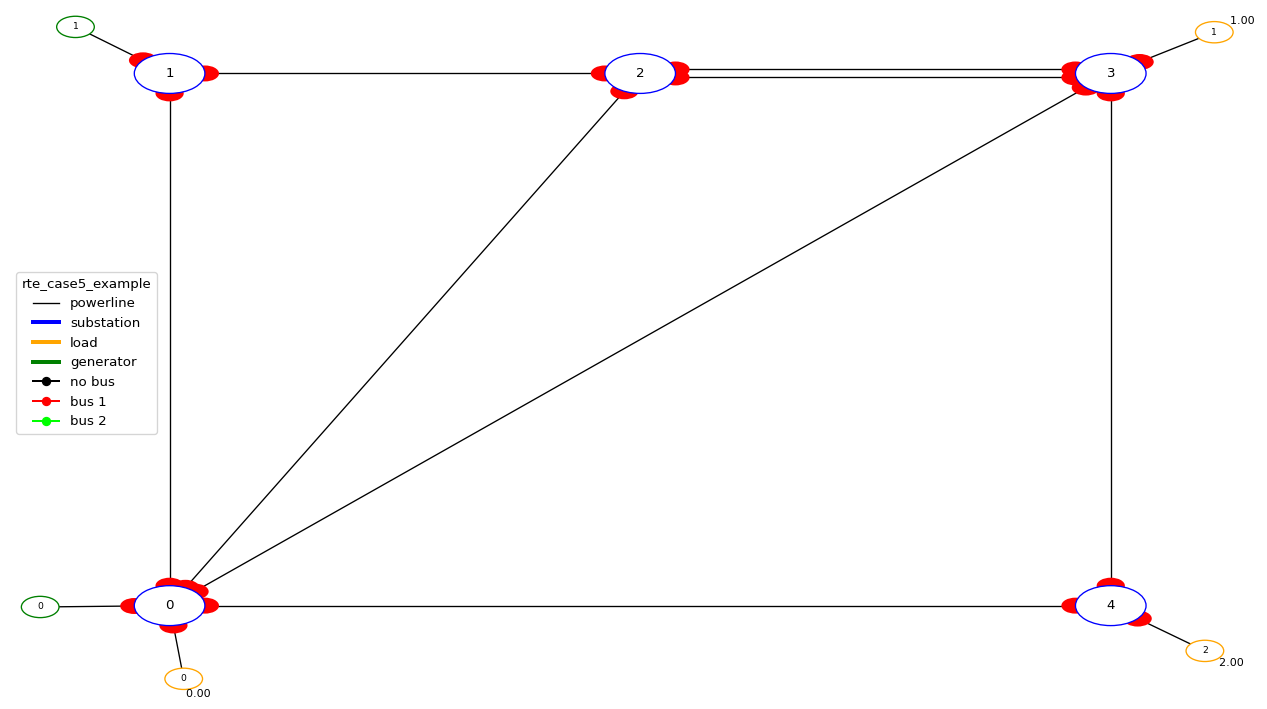

In [6]:
#看负载ID
_ = plot_helper.plot_info(load_values=[el for el in range(env.n_load)])

In [7]:
#基于"gym like"思路，创建一个do nothing agent
from grid2op.Agent import DoNothingAgent
my_agent = DoNothingAgent(env.action_space)
# 执行标准的gym loop，并保留所有观察结果
all_obs = []
obs = env.reset()
all_obs.append(obs)
reward = env.reward_range[0]
done = False
nb_step = 0
with tqdm(total=env.chronics_handler.max_timestep()) as pbar:
    while True:
        action = my_agent.act(obs, reward, done)
        obs, reward, done, _ = env.step(action)
        pbar.update(1)
        if done:
            break
        all_obs.append(obs)
        nb_step += 1

In [8]:
#查看这一段是否完成，或者是否出现game over
#结果显示game over:the agent 成功操作了 94个时间步, 然而整个片段共有2016个时间步
print("Number of timesteps computed: {}".format(nb_step))
print("Total maximum number of timesteps possible: {}".format(env.chronics_handler.max_timestep()))

Number of timesteps computed: 94
Total maximum number of timesteps possible: 2016


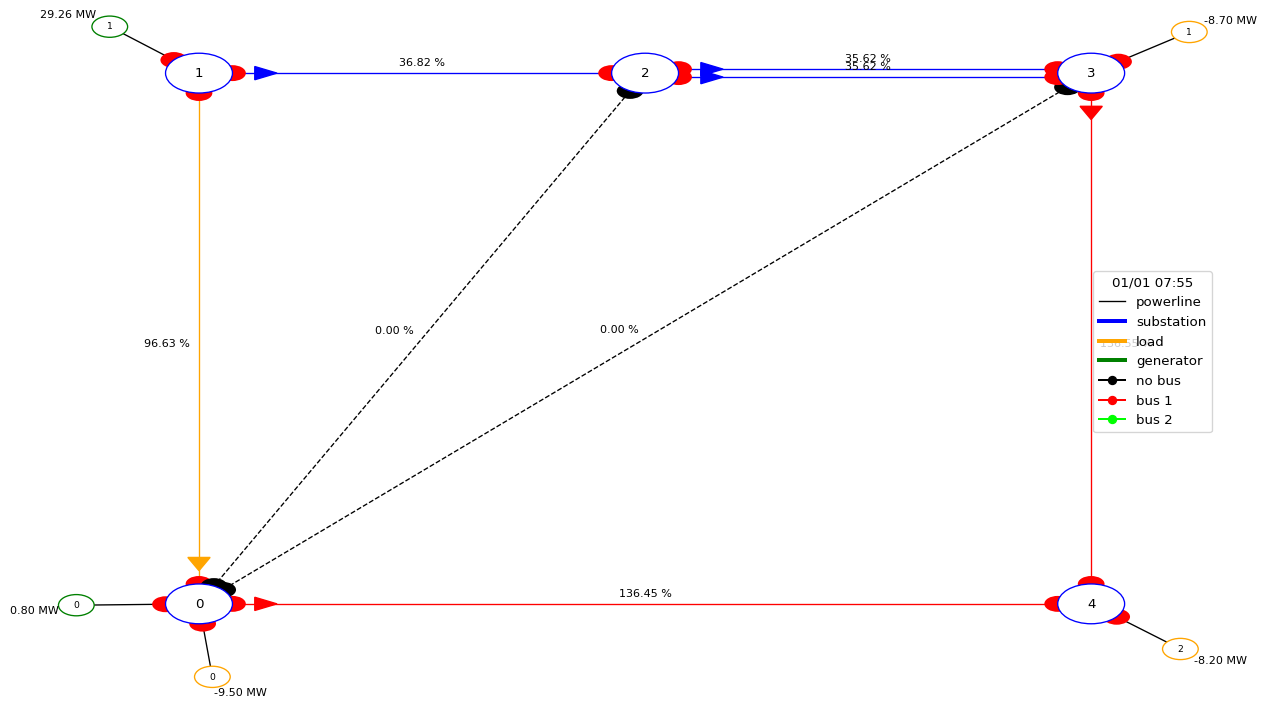

In [9]:
#通过观察最后一个时间步的断面可以调查game over的原因
#首先，创造一个观察工具.
#其次，画出最后一个断面。
last_obs = all_obs[-1]
_ = plot_helper.plot_obs(last_obs)

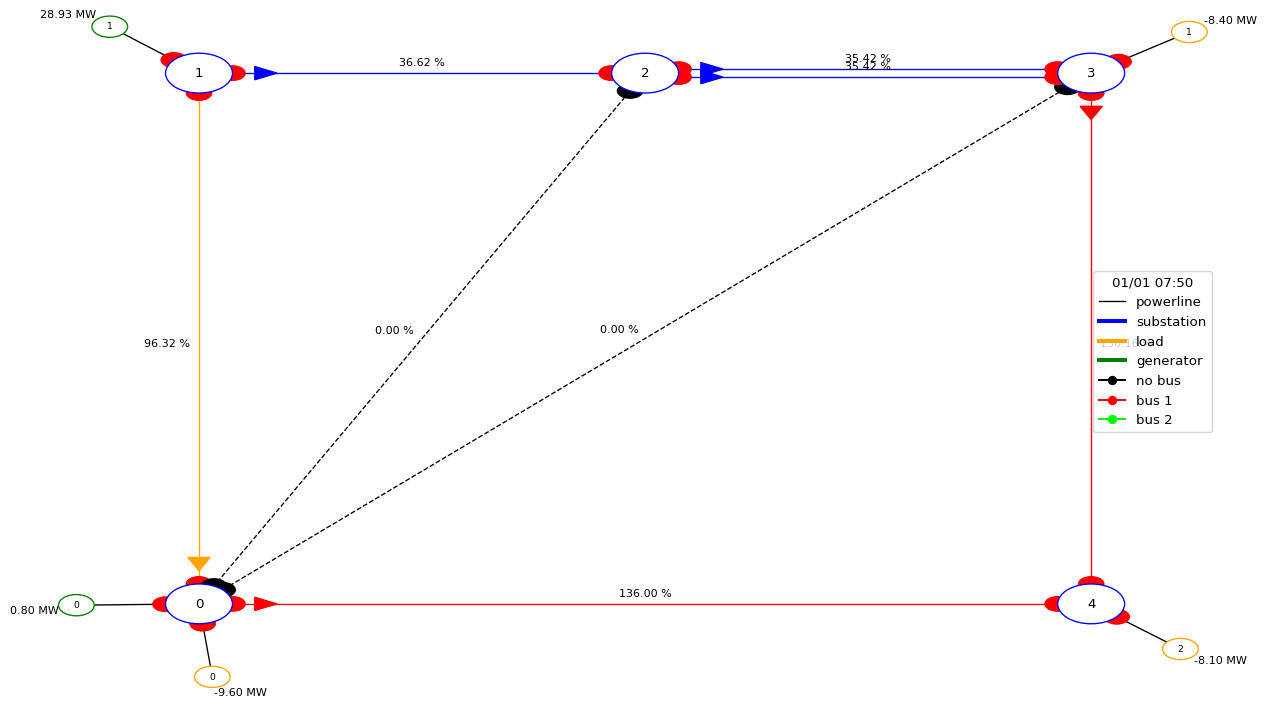

In [32]:
#查看倒数第二个断面
#通过观察，给负载2供电的线路全部断掉或者过载
previous_obs = all_obs[-2]
_ = plot_helper.plot_obs(previous_obs)

D:\virtualenvironment\L2PRN_grid2op\lib\site-packages\grid2op\MakeEnv\Make.py:265: UserWarning: You are using a development environment. This environment is not intended for training agents. It might not be up to date and its primary use if for tests (hence the "test=True" you passed as argument). Use at your own risk.
  warnings.warn(_MAKE_DEV_ENV_WARN)


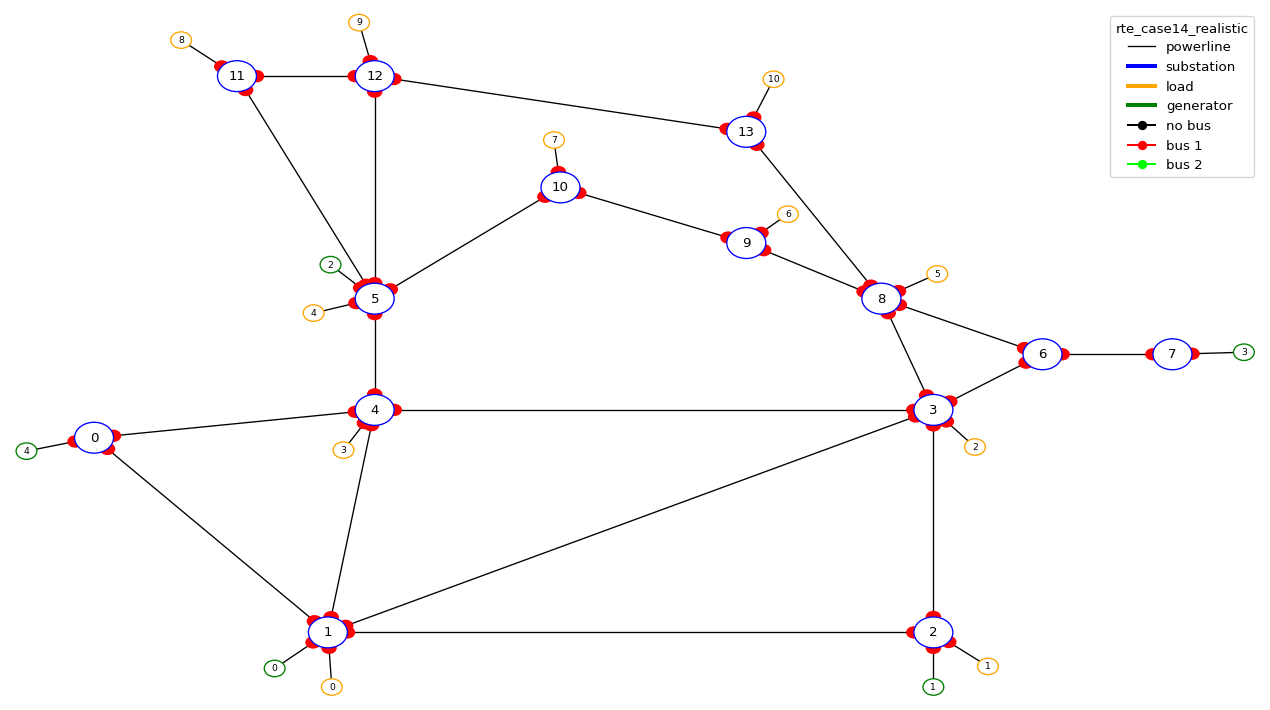

In [10]:
#这一部分展示怎样在电网里进行动作
#为达到这个目的，采用"rte_case14_realistic" 电网模型
env_14 = grid2op.make("rte_case14_realistic", test=True)
plot_helper_14 = PlotMatplot(env_14.observation_space)
_ = plot_helper_14.plot_layout()

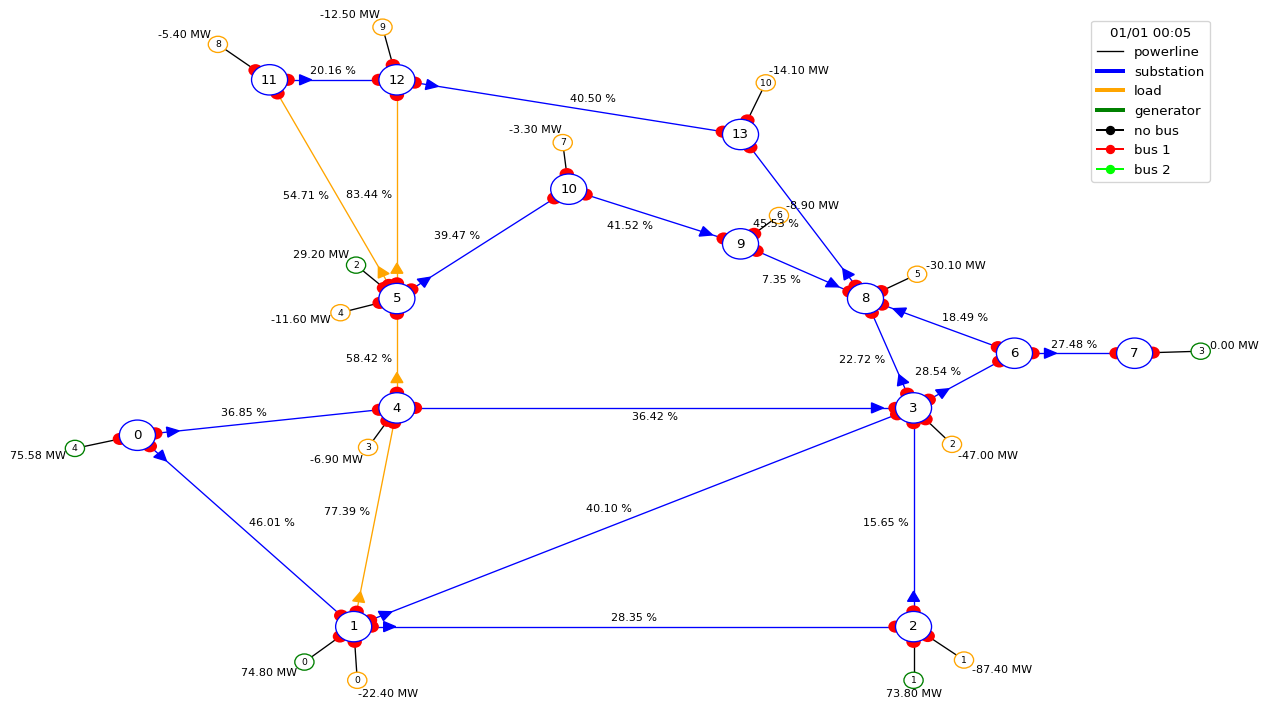

In [11]:
#画电网参数观测图
obs_before = env_14.reset()
_ = plot_helper_14.plot_obs(obs_before)

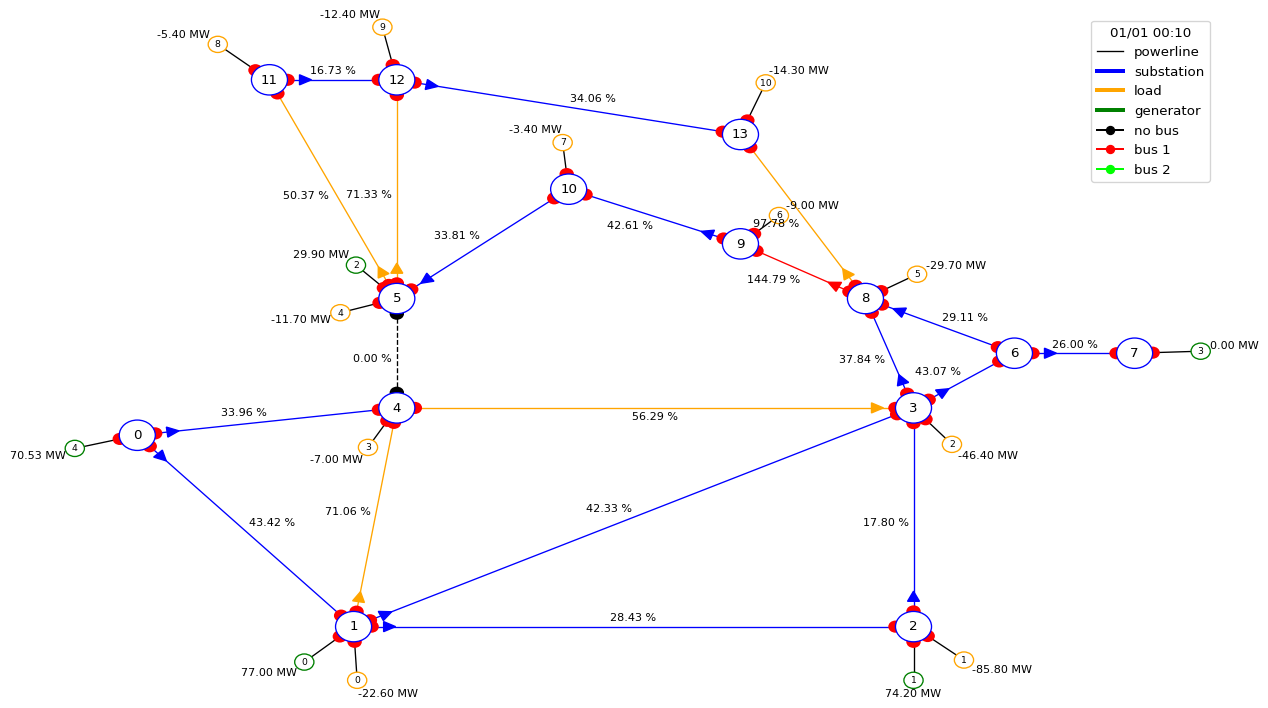

In [14]:
#执行动作:断电变电站4和5之间的母线17
#通过断面结果看出，断掉线17对4和5周边的潮流影响不大，然而却造成8和9以及9和10潮流反向，并造成8和9之间母线负荷激增
act = env_14.action_space.disconnect_powerline(line_name='4_5_17')
obs_after, reward, done, info = env_14.step(act)
_ = plot_helper_14.plot_obs(obs_after)